# Import and clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(style="white")

In [2]:
df=pd.read_csv('churn_telecom.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.shape

(3333, 21)

In [6]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [8]:
df.columns=df.columns.map(lambda x : x.replace(' ', '_'))

In [9]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [10]:
trans_col=['international_plan', 'voice_mail_plan',]

In [11]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
#transfer to binary
for col in df[trans_col]:
    df[col]=df[col].map({'yes':1, 'no':0})
   

In [13]:
df[trans_col]

,international_plan,voice_mail_plan
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0
...,...,...
3328,0,1
3329,0,0
3330,0,0
3331,1,0


In [14]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
df.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [16]:
#df=df.drop(['state', 'account_length', 'area_code', 'phone_number'], axis=1)

In [17]:
len(df.state.value_counts())

51

In [18]:
#make a table to see the relationship between state vs churn
state_rate=pd.crosstab(df.state, df.churn)
state_rate.head()

churn,False,True
state,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9


In [19]:
rate=pd.crosstab(df.state, df.churn, normalize='index')
rate.head()

churn,False,True
state,,
AK,0.942308,0.057692
AL,0.900000,0.100000
AR,0.800000,0.200000
AZ,0.937500,0.062500
CA,0.735294,0.264706


In [20]:
rate.sort_values(by=True)

churn,False,True
state,,
HI,0.943396,0.056604
AK,0.942308,0.057692
AZ,0.937500,0.062500
VA,0.935065,0.064935
IA,0.931818,0.068182
LA,0.921569,0.078431
NE,0.918033,0.081967
IL,0.913793,0.086207
WI,0.910256,0.089744


In [21]:
#State variable correlates with the target with the highest rate is 26% and the lowest is 5%. 
#I decided to keep "state" columns and drop some unnecessary columns

In [22]:
unnecessary_cols=['account_length', 'area_code', 'phone_number']

In [23]:
df.drop(unnecessary_cols, axis=1, inplace=True)

In [24]:
df.head()

,state,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
df.churn=df.churn.astype(int)

In [26]:
df.churn

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [27]:
#Checking for duplicate rows
df.duplicated().sum()

0

# EDA

In [28]:
df.shape

(3333, 18)

In [29]:
#split data to make it easier on scatter matrix
first=pd.concat([df.iloc[:, 0:8], df.churn], axis=1)
second=df.iloc[:, 8:18]

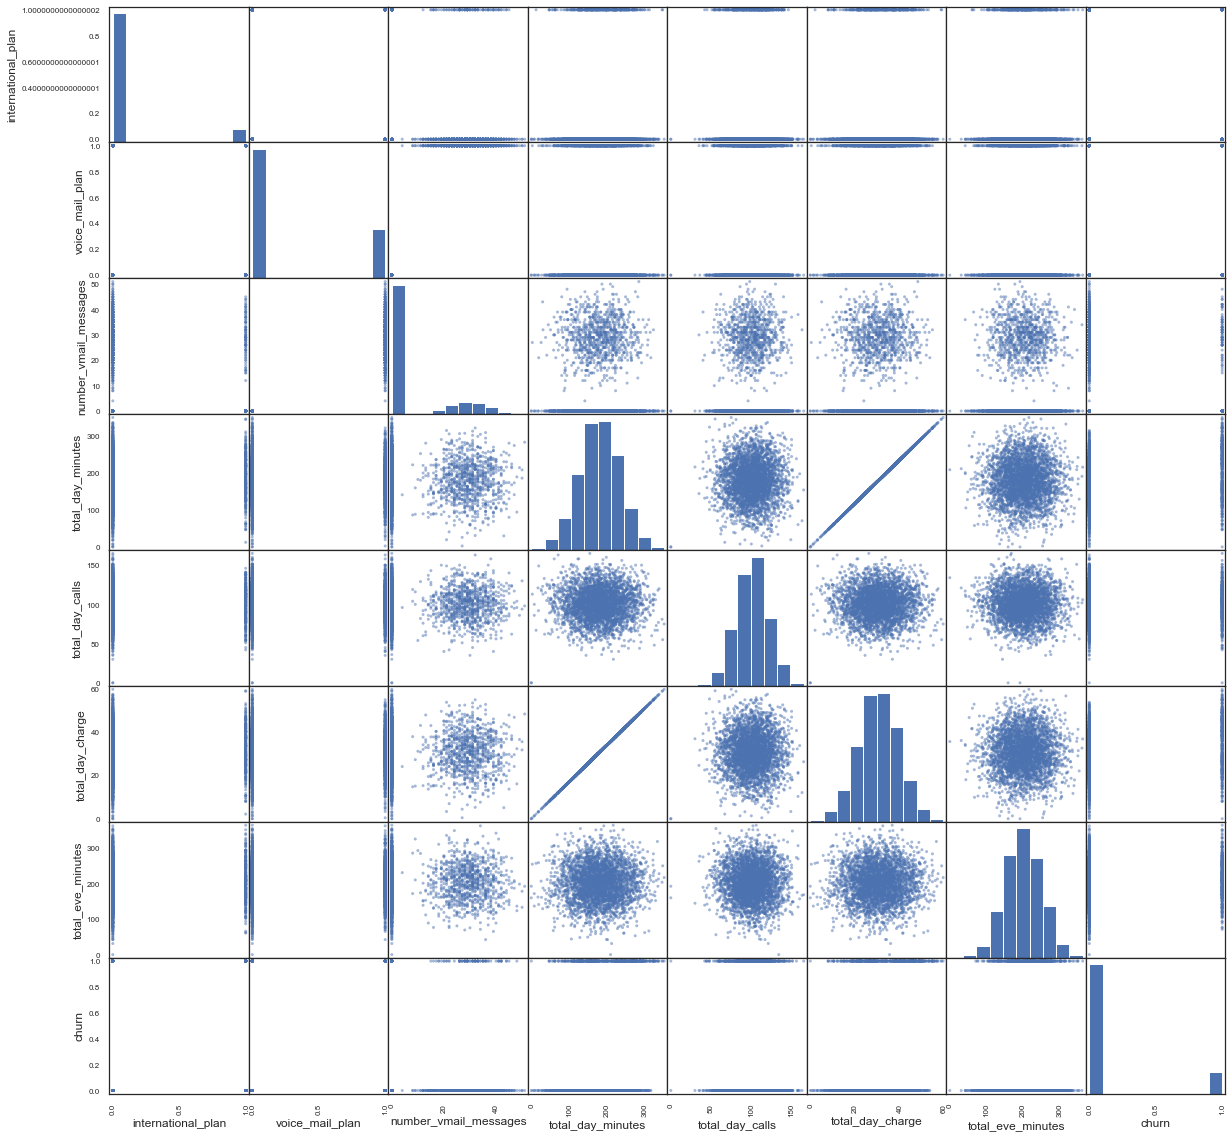

In [30]:
pd.plotting.scatter_matrix(first, alpha=0.5, figsize=[20,20])
plt.show()

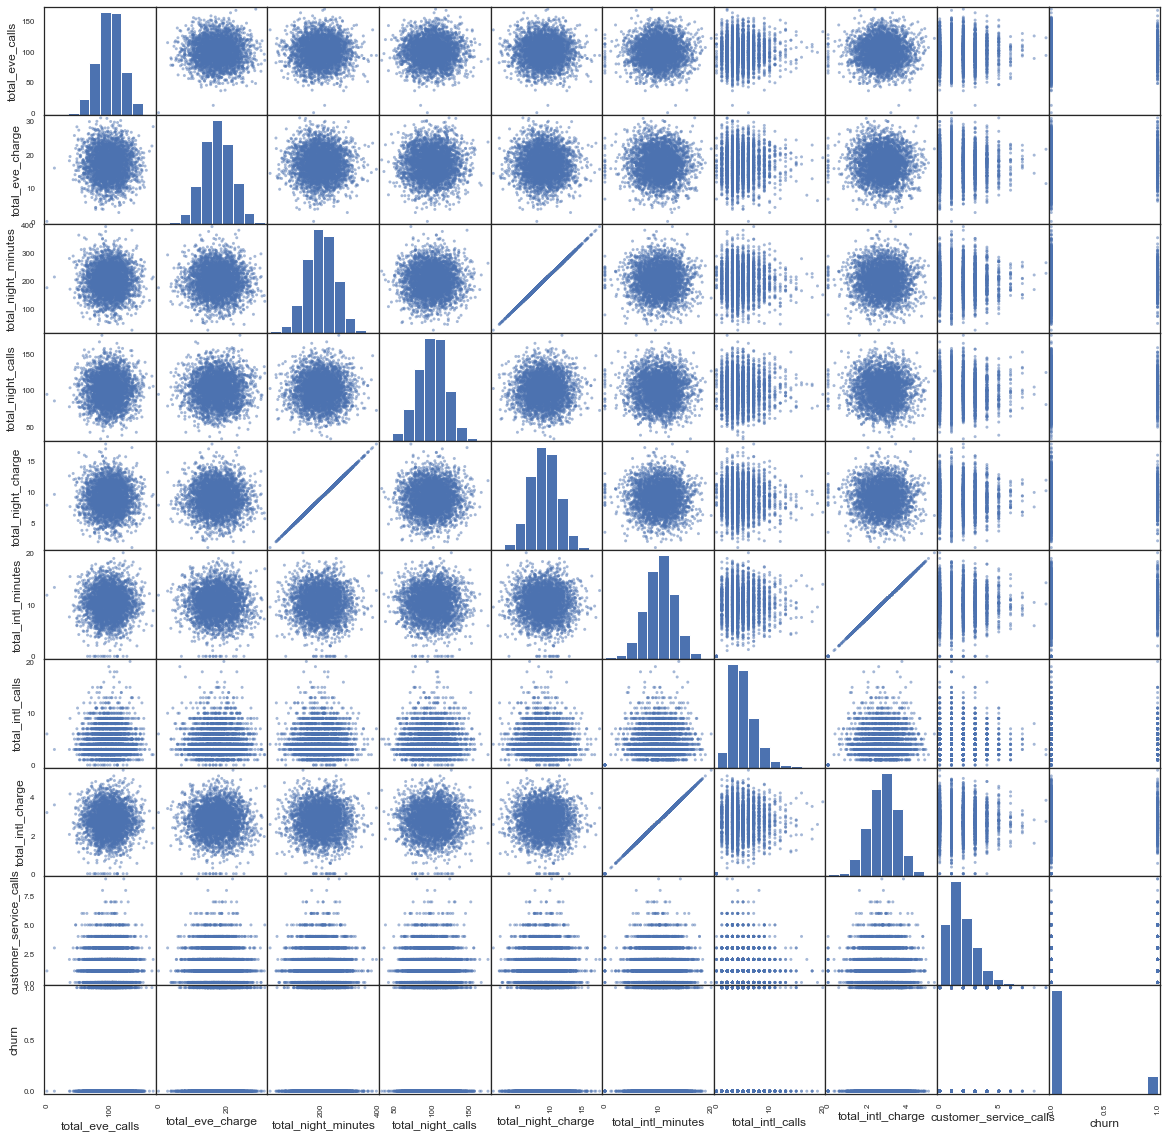

In [31]:
pd.plotting.scatter_matrix(second, alpha=0.5, figsize=[20,20])
plt.show()

In [32]:
#scatter matrix does not help a lot

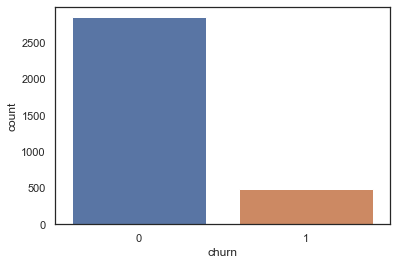

In [33]:
#less churn than did not.
#imbalance data. May need to SMOTE later
sns.countplot(x='churn', data=df)
plt.show()

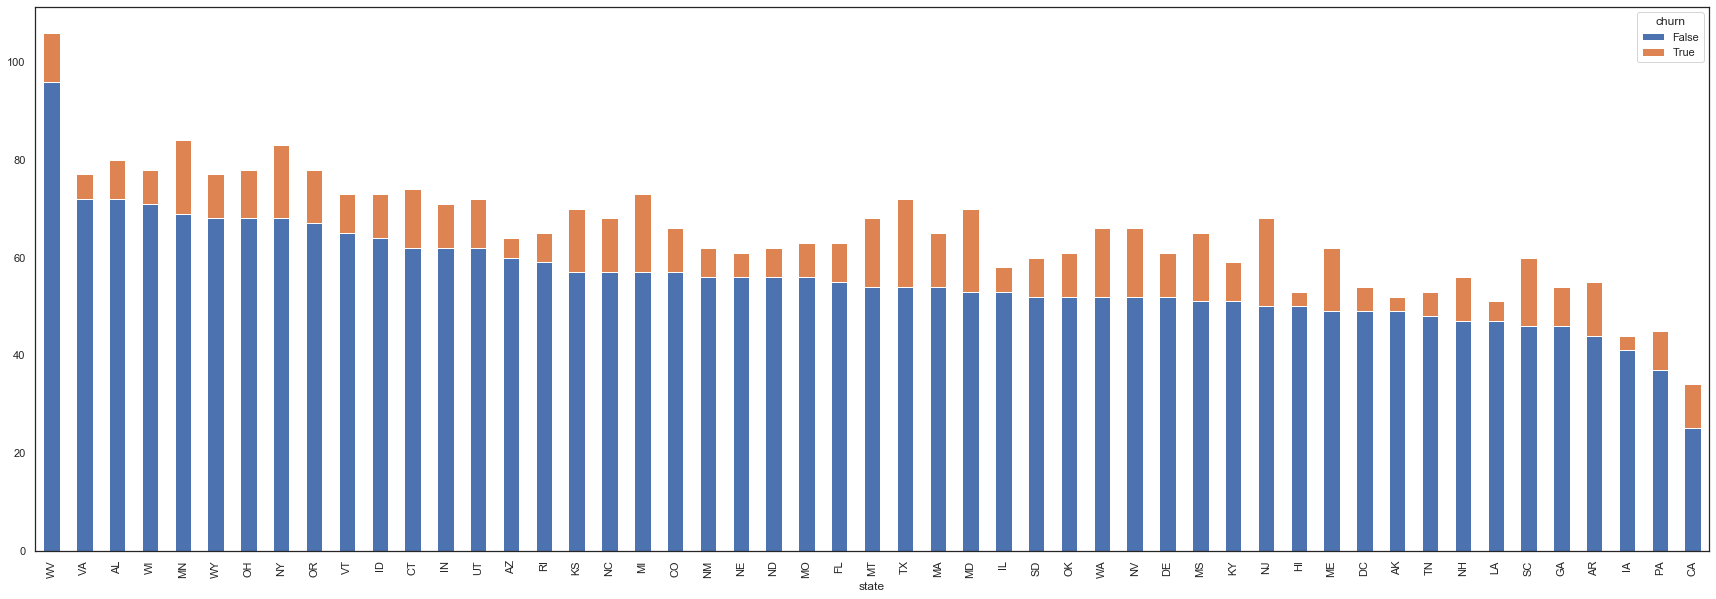

In [34]:
state_rate.sort_values(by=0, ascending=False, inplace=True)
state_rate.plot(kind='bar', figsize=[30,10], stacked=True)
plt.show()

EDA categorical variable

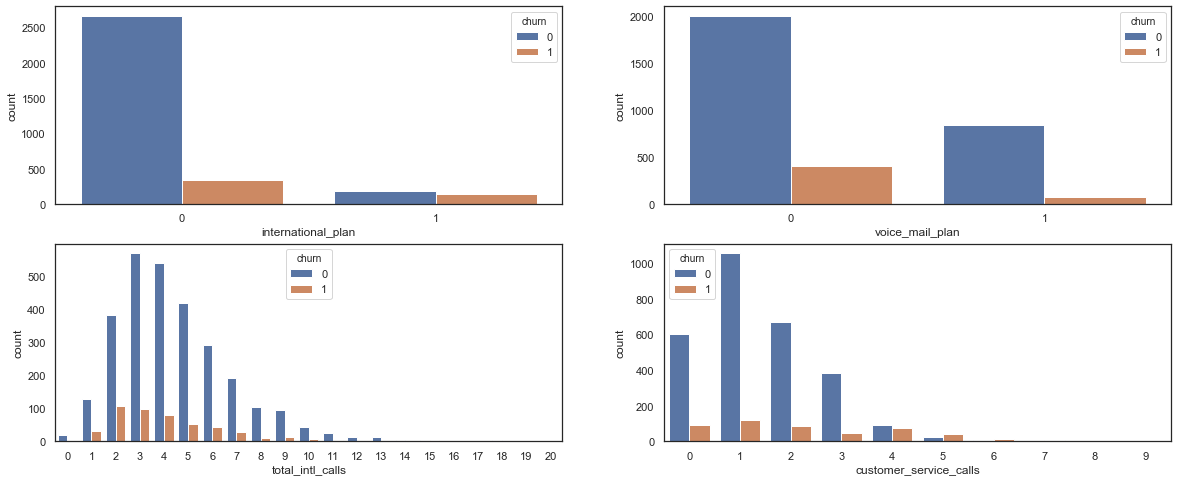

In [35]:
numlist=['international_plan','voice_mail_plan','total_intl_calls', 'customer_service_calls']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[20,8])
for ab, ax in zip(numlist, axes.flatten()):
    sns.countplot(x=ab,hue='churn', data=df, ax=ax)

In [36]:
#almost people who have international_plan did churn
#voice_mail_plan and  total_intl_calls have no correlation with churn
#people have over 4 custumer_service_calls often churn

EDA continuous variable

In [37]:
#df.groupby('churn').total_day_charge.hist(figsize=[12,8], stacked=True);
#this is also a way to plot, but it could not put legend. save it for future learning

In [38]:
conts=['number_vmail_messages', 'total_day_minutes', 'total_day_calls','total_day_charge', 'total_eve_minutes', 'total_eve_calls','total_eve_charge', 'total_night_minutes', 'total_night_calls','total_night_charge', 'total_intl_minutes','total_intl_charge']

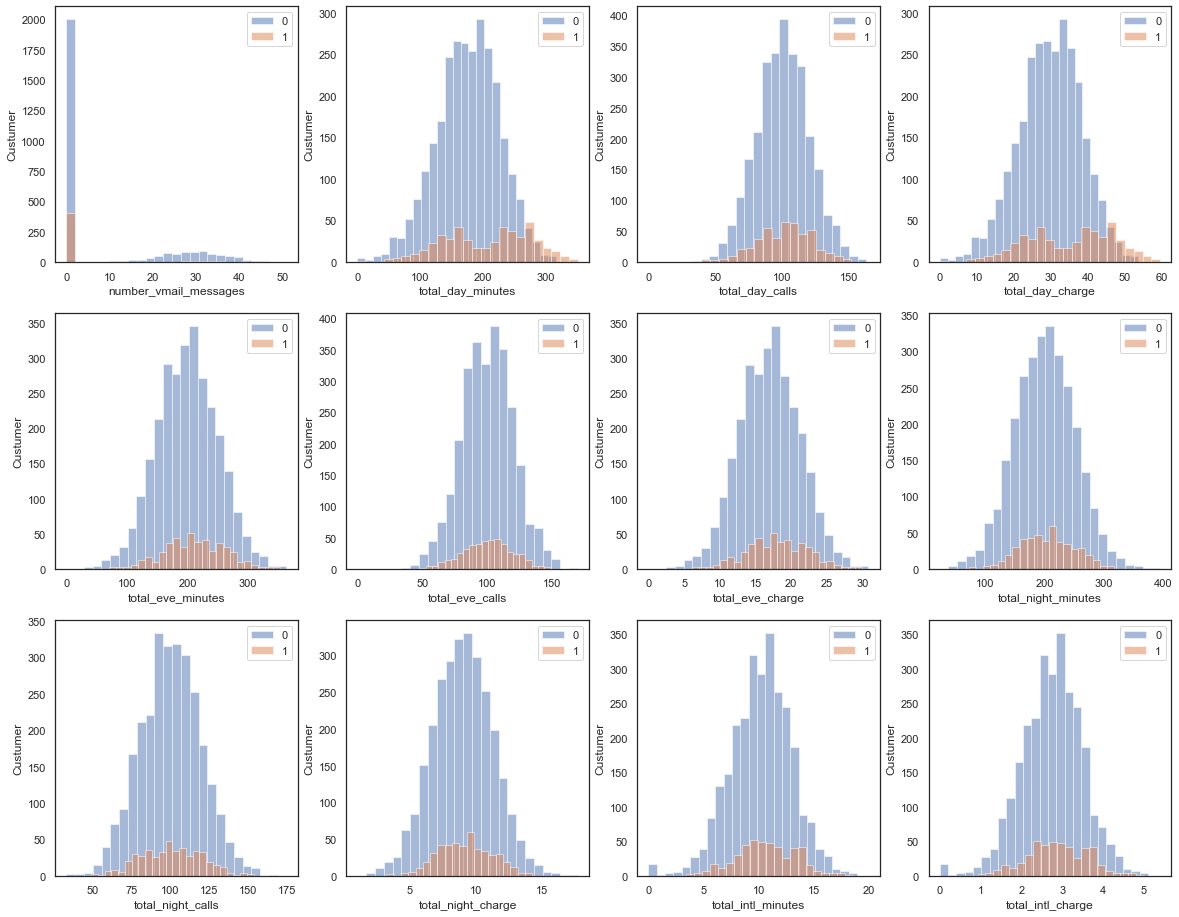

In [39]:
fig, axes =plt.subplots(3,4, figsize=[20,16])
for x, ax in zip(conts, axes.flatten()):
    ax.hist(df[df['churn'] ==0][x], bins = 25, label ='0', alpha = .50)
    ax.hist(df[df['churn']==1][x], bins = 25, label = '1', alpha = .50)
    ax.set_xlabel('{}'.format(x))
    ax.set_ylabel('Custumer')
    ax.legend(loc = 'upper right')

In [40]:
#total_day_minutes over 260 churn
#total_day_charge over 45 churn

# Feature Engineering

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [42]:
data=pd.get_dummies(df, drop_first=True)

In [43]:
X=data.drop('churn', axis=1)
y=data.churn

In [44]:
X.shape

(3333, 66)

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=10)

In [46]:
#Logistic regression, KNN and SVM need scale
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#   Base Model : Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [48]:
logreg=LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
#Generate predictions
y_hat_train=logreg.predict(X_train_scaled)
y_hat_test=logreg.predict(X_test_scaled)

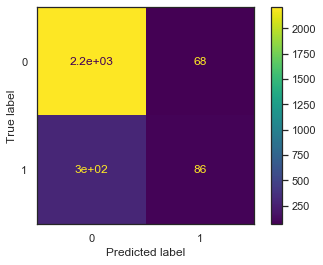

In [50]:
plot_confusion_matrix(logreg,X_train_scaled, y_train)
plt.show()

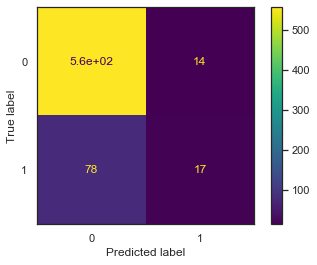

In [51]:
plot_confusion_matrix(logreg,X_test_scaled, y_test)
plt.show()

In [52]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       572
           1       0.55      0.18      0.27        95

    accuracy                           0.86       667
   macro avg       0.71      0.58      0.60       667
weighted avg       0.83      0.86      0.83       667



My baseline model has a vast amount of FN, that is why my Recall score is low.
I will focus on Recall score to compare between each model

# K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [54]:
def run_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_tr_pred=model.predict(x_train)
    y_pred=model.predict(x_test)
    metrics_train=classification_report(y_train, y_tr_pred)
    metrics_test=classification_report(y_test, y_pred)
    plot_train=plot_confusion_matrix(model,x_train, y_train)
    plt.show()
    plot_test=plot_confusion_matrix(model,x_test, y_test)
    plt.show()
    print('The Metrics train set')
    print(metrics_train)
    print('The Metrics test set')
    print(metrics_test)
       

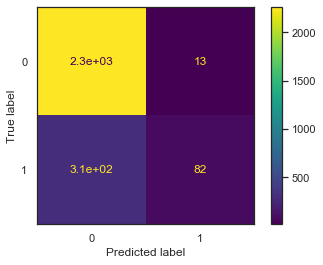

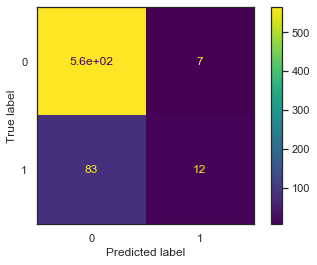

The Metrics train set
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2278
           1       0.86      0.21      0.34       388

    accuracy                           0.88      2666
   macro avg       0.87      0.60      0.64      2666
weighted avg       0.88      0.88      0.85      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       572
           1       0.63      0.13      0.21        95

    accuracy                           0.87       667
   macro avg       0.75      0.56      0.57       667
weighted avg       0.84      0.87      0.82       667



In [55]:
knn=KNeighborsClassifier()
run_model(knn, X_train_scaled, X_test_scaled, y_train, y_test)

# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
nb=GaussianNB()

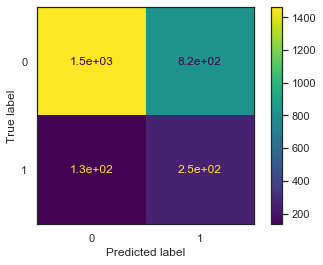

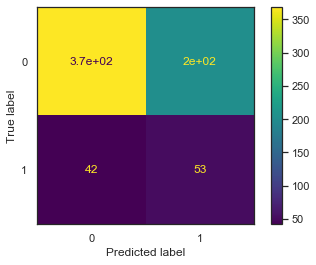

The Metrics train set
              precision    recall  f1-score   support

           0       0.92      0.64      0.76      2278
           1       0.24      0.65      0.35       388

    accuracy                           0.64      2666
   macro avg       0.58      0.65      0.55      2666
weighted avg       0.82      0.64      0.70      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.90      0.65      0.75       572
           1       0.21      0.56      0.30        95

    accuracy                           0.63       667
   macro avg       0.55      0.60      0.53       667
weighted avg       0.80      0.63      0.69       667



In [58]:
run_model(nb, X_train, X_test, y_train, y_test)

After 3 models, I dont see any majority prediction. Therefore, I dont need to worry about imbalance data

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier 

In [60]:
decision=DecisionTreeClassifier(random_state=10)

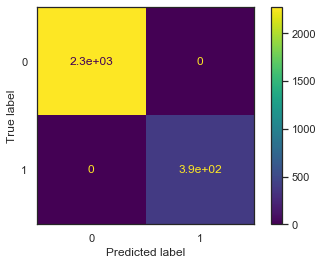

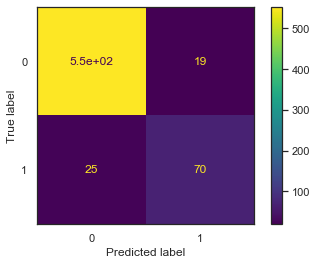

The Metrics train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2278
           1       1.00      1.00      1.00       388

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       572
           1       0.79      0.74      0.76        95

    accuracy                           0.93       667
   macro avg       0.87      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667



In [61]:
run_model(decision, X_train, X_test, y_train, y_test)

In [62]:
# Plot and show decision tree
#from sklearn import tree
#plt.figure(figsize=(12,12), dpi=500)
#tree.plot_tree(decision, 
#               feature_names=X.columns,
#               class_names=np.unique(y).astype('str'),
#               filled=True, rounded=True)
#plt.show()

In [63]:
decision.feature_importances_

array([0.0811265 , 0.00542934, 0.06578551, 0.14660431, 0.01041978,
       0.11515627, 0.10933327, 0.02466171, 0.04319328, 0.01902308,
       0.01356039, 0.04745811, 0.01126086, 0.06853178, 0.07972493,
       0.09764019, 0.        , 0.        , 0.        , 0.00551833,
       0.00194977, 0.00126878, 0.00168512, 0.        , 0.        ,
       0.00060935, 0.        , 0.        , 0.00484086, 0.00287781,
       0.00092625, 0.00073173, 0.        , 0.        , 0.        ,
       0.00617012, 0.00070552, 0.00205276, 0.        , 0.        ,
       0.00483672, 0.00056008, 0.00096724, 0.        , 0.00058962,
       0.00056021, 0.00282778, 0.00133612, 0.        , 0.00068962,
       0.00298419, 0.        , 0.        , 0.00281259, 0.        ,
       0.00270115, 0.        , 0.        , 0.00346141, 0.0004878 ,
       0.        , 0.0003583 , 0.00276494, 0.0014013 , 0.        ,
       0.00241519])

# Bagged trees

In [64]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [65]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(random_state=10), 
                                 n_estimators=20)

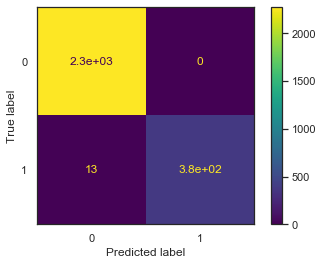

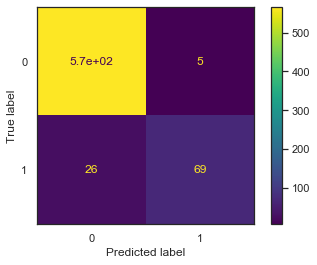

The Metrics train set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2278
           1       1.00      0.97      0.98       388

    accuracy                           1.00      2666
   macro avg       1.00      0.98      0.99      2666
weighted avg       1.00      1.00      1.00      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       572
           1       0.93      0.73      0.82        95

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



In [66]:
run_model(bagged_tree, X_train, X_test, y_train, y_test)

# Random forests

In [67]:
forest = RandomForestClassifier()

In [68]:
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

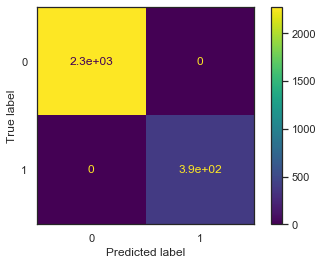

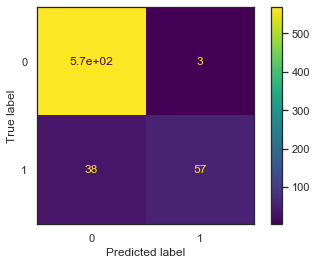

The Metrics train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2278
           1       1.00      1.00      1.00       388

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       572
           1       0.95      0.60      0.74        95

    accuracy                           0.94       667
   macro avg       0.94      0.80      0.85       667
weighted avg       0.94      0.94      0.93       667



In [69]:
run_model(forest, X_train, X_test, y_train, y_test)

# Gradient Boosting

In [70]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [71]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=10)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=10)

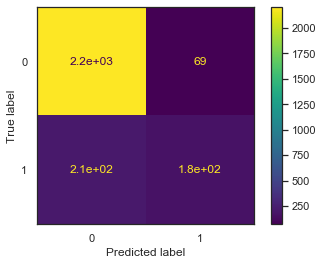

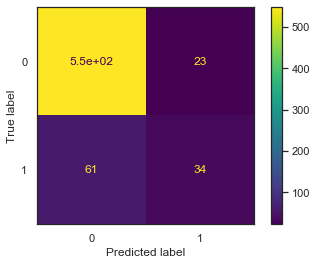

The Metrics train set
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2278
           1       0.72      0.45      0.55       388

    accuracy                           0.89      2666
   macro avg       0.81      0.71      0.75      2666
weighted avg       0.88      0.89      0.88      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       572
           1       0.60      0.36      0.45        95

    accuracy                           0.87       667
   macro avg       0.75      0.66      0.69       667
weighted avg       0.86      0.87      0.86       667



In [72]:
run_model(adaboost_clf, X_train, X_test, y_train, y_test)

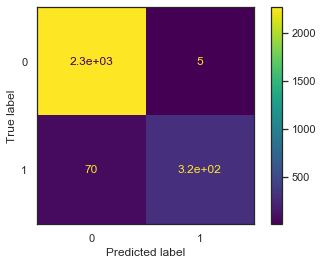

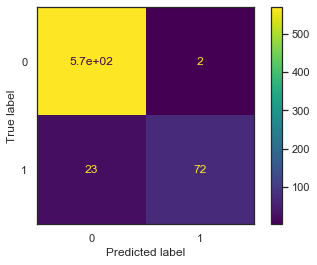

The Metrics train set
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2278
           1       0.98      0.82      0.89       388

    accuracy                           0.97      2666
   macro avg       0.98      0.91      0.94      2666
weighted avg       0.97      0.97      0.97      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       572
           1       0.97      0.76      0.85        95

    accuracy                           0.96       667
   macro avg       0.97      0.88      0.92       667
weighted avg       0.96      0.96      0.96       667



In [73]:
run_model(gbt_clf, X_train, X_test, y_train, y_test)

# XGBoost

In [74]:
from xgboost import XGBClassifier

In [75]:
xg=XGBClassifier()

In [76]:
xg

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

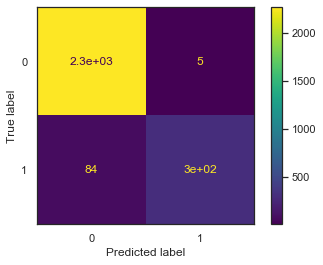

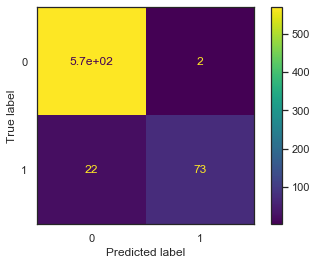

The Metrics train set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2278
           1       0.98      0.78      0.87       388

    accuracy                           0.97      2666
   macro avg       0.97      0.89      0.93      2666
weighted avg       0.97      0.97      0.97      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       572
           1       0.97      0.77      0.86        95

    accuracy                           0.96       667
   macro avg       0.97      0.88      0.92       667
weighted avg       0.96      0.96      0.96       667



In [77]:
run_model(xg, X_train, X_test, y_train, y_test)

After running all model, XGBoost and Random Forest did really well on data. The Recall score are the highest compare with the other models, which are 0,77 and 0,73.
I decided to choose those to tune params


# GridSearch

GridSearch with XGBoost

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [2, 3, 4],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 1],
    'gamma':[0, 0.1]}

In [80]:
grid_clf = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)

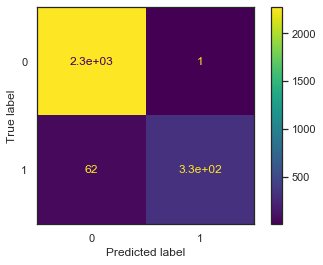

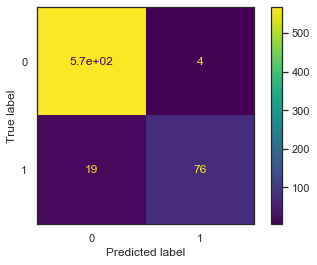

The Metrics train set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2278
           1       1.00      0.84      0.91       388

    accuracy                           0.98      2666
   macro avg       0.99      0.92      0.95      2666
weighted avg       0.98      0.98      0.98      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       572
           1       0.95      0.80      0.87        95

    accuracy                           0.97       667
   macro avg       0.96      0.90      0.92       667
weighted avg       0.97      0.97      0.96       667



In [81]:
run_model(grid_clf, X_train, X_test, y_train, y_test)

GridSearch with RandomForest

In [82]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 6]}

In [83]:
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)

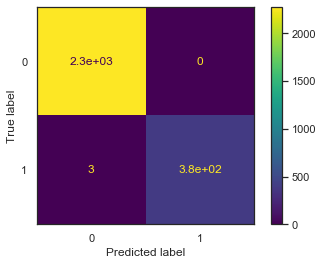

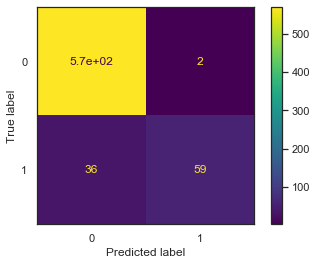

The Metrics train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2278
           1       1.00      0.99      1.00       388

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       572
           1       0.97      0.62      0.76        95

    accuracy                           0.94       667
   macro avg       0.95      0.81      0.86       667
weighted avg       0.94      0.94      0.94       667



In [84]:
run_model(rf_grid_search, X_train, X_test, y_train, y_test)

After GridSearch, both models improved slightly. I decided to chose the XGBoost with higher Recall

In [85]:
#find the best parameters of GridSearch
grid_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

# Final model

In [86]:
final_XG=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

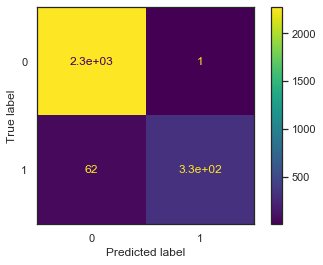

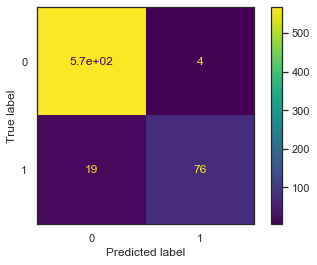

The Metrics train set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2278
           1       1.00      0.84      0.91       388

    accuracy                           0.98      2666
   macro avg       0.99      0.92      0.95      2666
weighted avg       0.98      0.98      0.98      2666

The Metrics test set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       572
           1       0.95      0.80      0.87        95

    accuracy                           0.97       667
   macro avg       0.96      0.90      0.92       667
weighted avg       0.97      0.97      0.96       667



In [87]:
run_model(final_XG, X_train, X_test, y_train, y_test)

In [88]:
from xgboost import plot_importance
#plot_importance(final_XG)
#plt.show()
#this is a built in function to plot a feature important in XGBoost. but it gave a different value.
# will do a research later

In [89]:
final_XG.feature_importances_

array([0.09019344, 0.10141592, 0.02955414, 0.08380297, 0.026834  ,
       0.        , 0.05230824, 0.02731568, 0.        , 0.03597663,
       0.02777225, 0.        , 0.05042459, 0.06304015, 0.        ,
       0.10480948, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04782936, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02678241, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03429902, 0.        , 0.        , 0.        ,
       0.02778648, 0.0278926 , 0.        , 0.        , 0.        ,
       0.        , 0.04066337, 0.        , 0.        , 0.        ,
       0.02552998, 0.        , 0.        , 0.        , 0.        ,
       0.03087945, 0.        , 0.        , 0.04488981, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

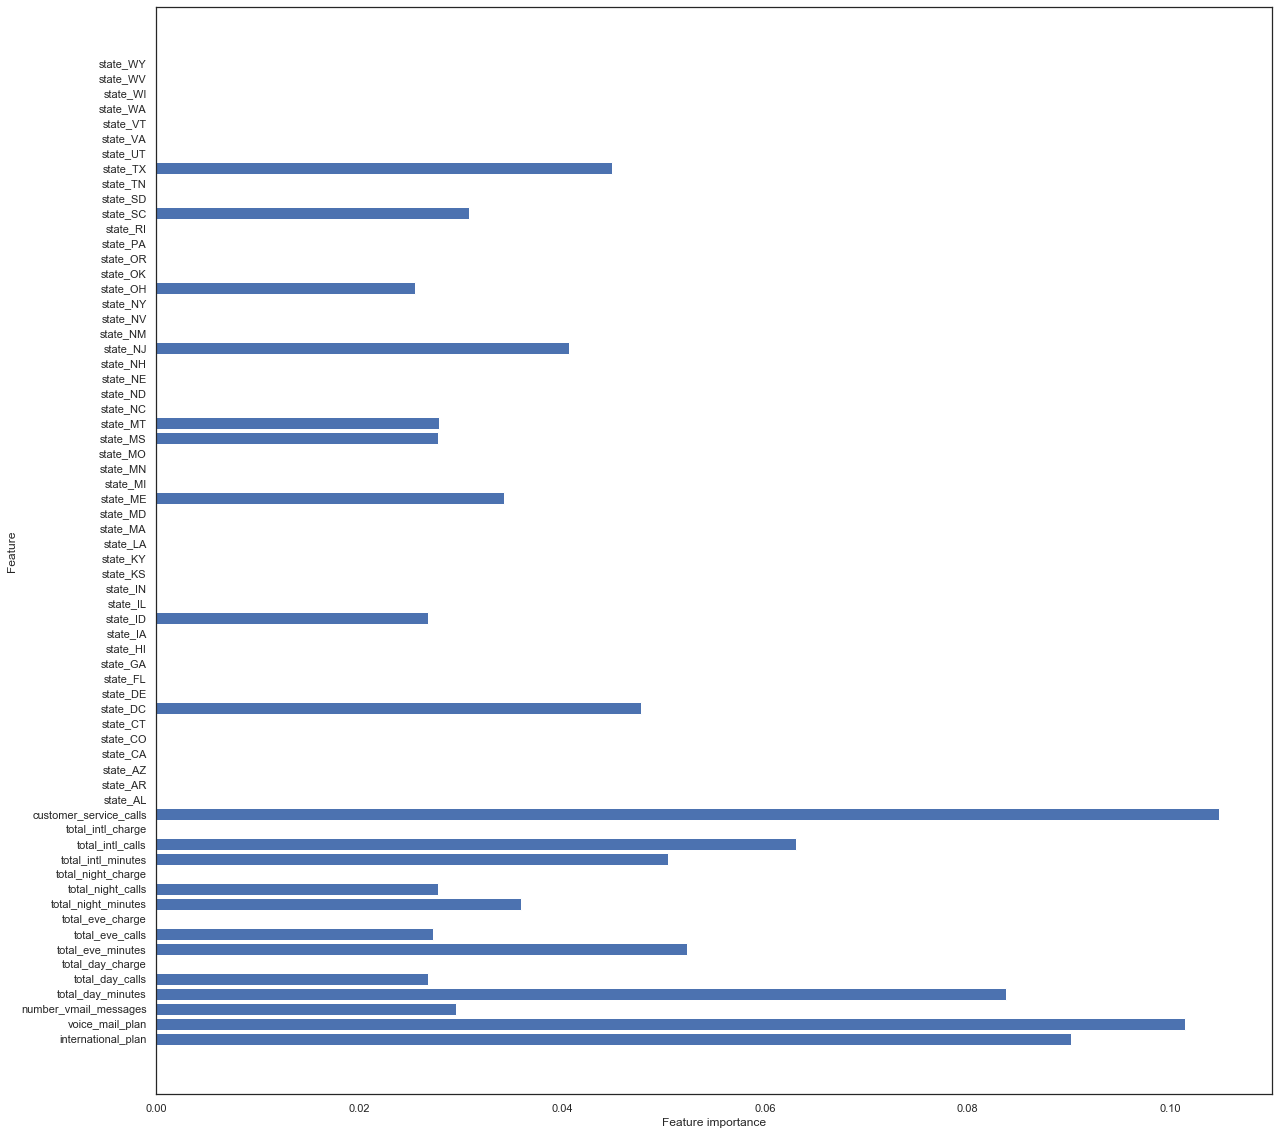

In [90]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(final_XG)

# Future Works

- My data pretty small and I left it with some outliers. I would like to collect more data and remove outliers next time in oder to make my model work better

- Remove less important features, and run model again with some top important feature

- There is a built-in function to plot important features in xgboost library, but it gave a different results from sklearn. I will do some research later 

- I will figure out which variable more correlation with labels. Therefore, I could give advice to the company to improve the churn rate